In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random
import requests

# Introduction

Through this report, we attempt to find how our nation's veterans are represented in different industries as business owners.



## Extract

Data was extracted using the following api's from the Annual Business Survey

* [Business Characteristics Summary][1] 


* [Characteristics of Businesses][2]

[1]: https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:* "Title"

[2]: https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:* "Title"

Function used to call the apis and return dataframes

In [61]:
BSurl = 'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*'
CBurl = 'https://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,QDESC,QDESC_LABEL,BUSCHAR,BUSCHAR_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*'

def getDF(apiurl):
    response = requests.get(apiurl)

    col = response.json()[0] # header row

    BS = pd.DataFrame(data = response.json(),columns = col) #makes data frame with the header row as column names
    BS.drop(0,axis = 0,inplace=True) #it came with the header row that I dropped
    return BS

BS = getDF(BSurl)
CB = getDF(CBurl)
BS.head()

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,us
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,3.0,None,8.9,None,7.7,None,7.0,None,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,19.2,None,0.0,None,13.5,None,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,4.7,None,8.2,None,4.8,None,7.4,None,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,5.9,None,4.3,None,5.6,None,6.3,None,1
5,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,None,6.0,None,16.2,None,6.7,None,10.7,None,1


### Transform

Transforms the numeric columns from strings to integers

In [62]:
BS['EMP'] = BS['EMP'].map(lambda x: int(x))
BS['FIRMPDEMP'] = BS['FIRMPDEMP'].map(lambda x: int(x))
BS['RCPPDEMP'] = BS['RCPPDEMP'].map(lambda x: int(x))

Takes in the dataframe and returns only Veterans, and removes the 'total' rows

Then, starts a new dataframe to look at what types of workers were used among veteran owned businesses. Then, Filters out irrelevant data and shortens responses for cleaner visualizations.    

In [66]:
Veterans = BS[BS['VET_GROUP_LABEL'] == 'Veteran']
Veterans = Veterans[Veterans['NAICS2017_LABEL'] != 'Total for all sectors']


NAICS2017_LABEL
Accommodation and food services                                             6
Administrative and support and waste management and remediation services    6
Agriculture, forestry, fishing and hunting                                  4
Arts, entertainment, and recreation                                         9
Construction                                                                5
Name: Closed, dtype: int64

Takes in the Characteristics of Business DF and filters for veteran respondents of the types of workers question. Then, filters out irrelevant information before cleaning the label names for vizualizations.

In [ ]:
Veteransworkers = CB[CB['QDESC_LABEL'] == 'WORKERS']
Veteransworkers = Veteransworkers[Veteransworkers['VET_GROUP_LABEL'] == 'Veteran']
Veteransworkers = Veteransworkers[Veteransworkers['NAICS2017_LABEL'] != 'Total for all sectors']
Veteransworkers = Veteransworkers[(Veteransworkers['BUSCHAR_LABEL'] != 'Total reporting') & (Veteransworkers['BUSCHAR_LABEL'] != 'Item not reported') & (Veteransworkers['BUSCHAR_LABEL'] != 'All firms')]
Veteransworkers['BUSCHAR_LABEL'] = Veteransworkers['BUSCHAR_LABEL'].map(lambda x: 'Contractors' if 'Contractors' in x else x)
Veteransworkers['BUSCHAR_LABEL'] = Veteransworkers['BUSCHAR_LABEL'].map(lambda x: 'Temporary' if 'Temporary' in x else x)
Veteransworkers['BUSCHAR_LABEL'] = Veteransworkers['BUSCHAR_LABEL'].map(lambda x: 'Leased' if 'Leased' in x else x)

Takes in a new DF from our characteristics of business data frame. Cleans out unwanted rows, and creates a temporary DF. Both DF are renamed for clarity, grouped and aggragated, then concacted together for comparison.

In [65]:
Closed = CB[CB['QDESC_LABEL'] == 'CEASEOPS']
Closed = Closed[(Closed['VET_GROUP_LABEL'] == 'Veteran') & (Closed['NAICS2017_LABEL'] != 'Total for all sectors') ]
Open = Closed[Closed['BUSCHAR'] == 'LI' ] 
Open = Open.rename({'BUSCHAR_LABEL' : 'Open'}, axis = 1)
Open = Open.groupby('NAICS2017_LABEL').agg('count')['Open']
Open.reset_index()
Closed = Closed[Closed['BUSCHAR'] == 'LI00']
Closed = Closed.rename({'BUSCHAR_LABEL' : 'Closed'} , axis = 1)
Closed = Closed.groupby('NAICS2017_LABEL').agg('count')['Closed']
Closed.reset_index()
Closed = pd.concat([Closed, Open], axis = 1)
Closed.reset_index()
Closed.head()

<class 'pandas.core.frame.DataFrame'>


#### Load

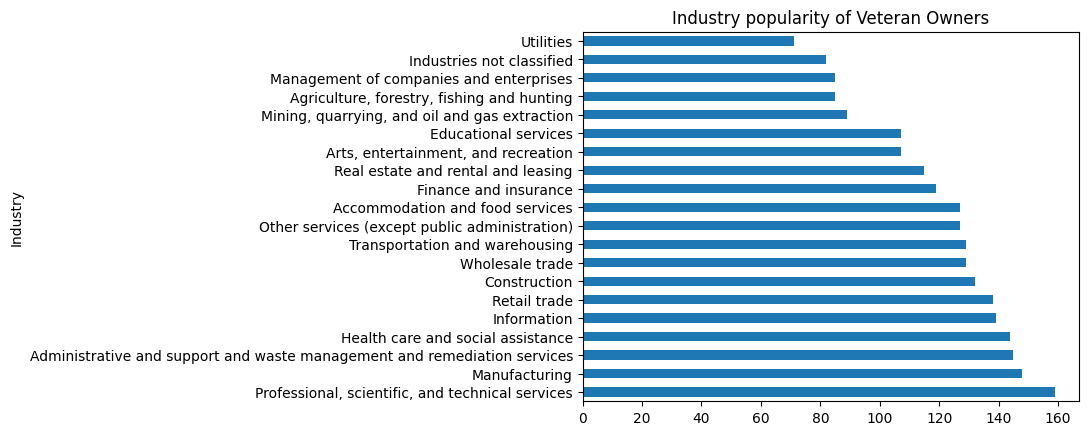

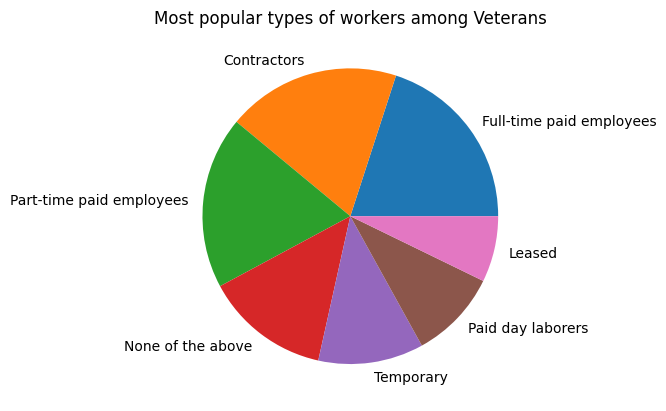

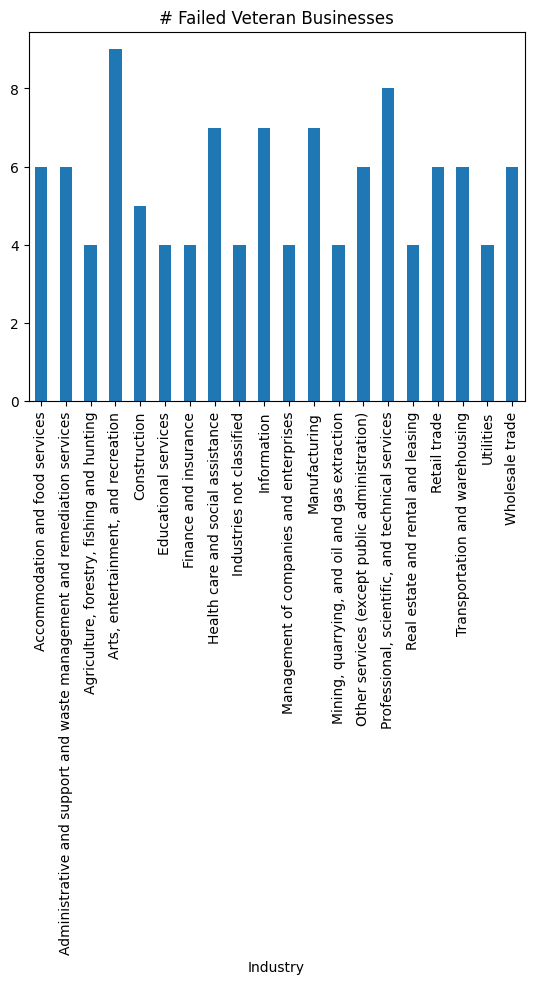

In [77]:
Veterans['NAICS2017_LABEL'].value_counts().plot.barh(title = 'Industry popularity of Veteran Owners', xlabel = 'Industry', ylabel = 'Number of Businesses')
plt.show()
bx = Veteransworkers['BUSCHAR_LABEL'].value_counts().plot(kind='pie', title = 'Most popular types of workers among Veterans', xlabel = '', ylabel = '')
plt.show()
Closed.plot(kind = 'bar', title = '# Failed Veteran Businesses', xlabel='Industry')
plt.show()
